# Naive bayse Gaussian

In [51]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv("D:\\Projects\\working_data\\Medicaldataset.csv")

In [53]:
condition = [
    df["Result"] == 'negative',
    df["Result"] == 'positive'
]

In [54]:
choice = [0,1]

In [55]:
df['Result'] = np.select(condition,choice,default=0)

In [56]:
print(df.head(5))

   Age  Gender  Heart rate  Systolic blood pressure  Diastolic blood pressure  \
0   64       1          66                      160                        83   
1   21       1          94                       98                        46   
2   55       1          64                      160                        77   
3   64       1          70                      120                        55   
4   55       1          64                      112                        65   

   Blood sugar  CK-MB  Troponin  Result  
0        160.0   1.80     0.012       0  
1        296.0   6.75     1.060       1  
2        270.0   1.99     0.003       0  
3        270.0  13.87     0.122       1  
4        300.0   1.08     0.003       0  


In [57]:
df['Gender'].unique()

array([1, 0])

In [58]:
model = GaussianNB()

In [59]:
df.columns

Index(['Age', 'Gender', 'Heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin',
       'Result'],
      dtype='object')

In [60]:
columns = ['Age', 'Gender', 'Heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin']

In [61]:
X = df[columns]

In [62]:
Y = df['Result']

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [64]:
model.fit(X_train,Y_train)

,priors,None
,var_smoothing,1e-09


In [65]:
prediction = model.predict(X_test)

In [66]:
accuracy_score(Y_test,prediction)


0.8848484848484849

In [67]:
confusion_matrix(Y_test,prediction)

array([[126,   2],
       [ 36, 166]])

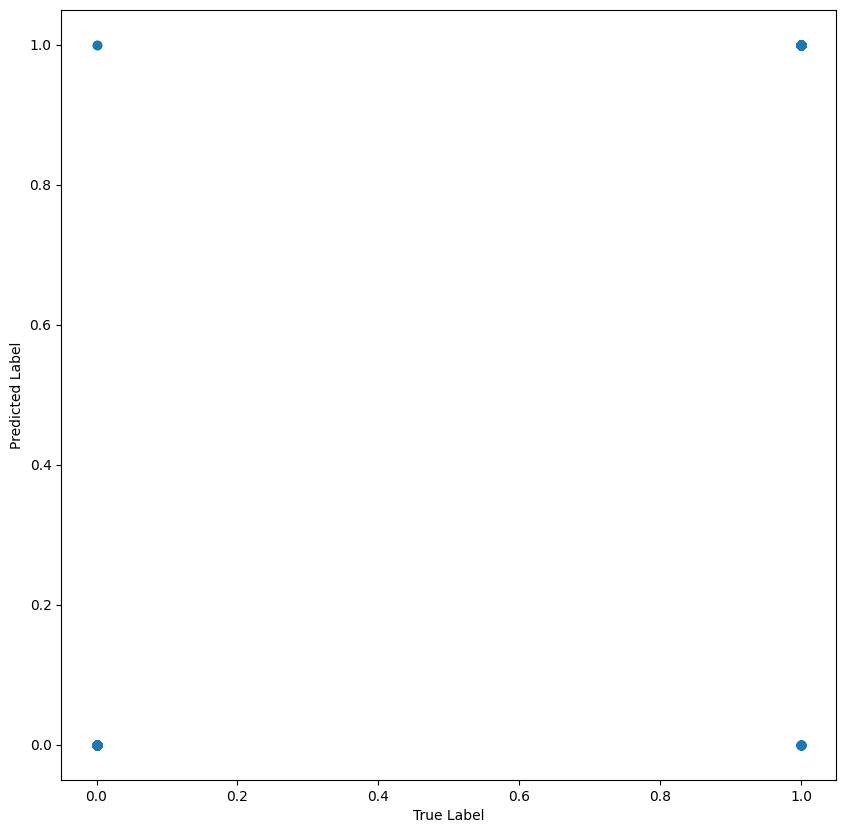

In [72]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test,prediction)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()

# Multinomial Naive Bayes

In [107]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [115]:
mn_df = pd.read_csv("D:\\Projects\\working_data\\training.1600000.processed.noemoticon.csv",
                 names=["target", "id", "date", "flag", "user", "text"],
                 encoding="ISO-8859-1")

In [116]:
print(mn_df.head(5))

   target          id                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  


In [132]:
X_mn = mn_df['text']
Y_mn = mn_df['target']

In [133]:
vectorizer = CountVectorizer(stop_words='english')
X_vectorized = vectorizer.fit_transform(X_mn)

In [134]:
X_vectorized.shape

(1600000, 684047)

In [151]:
X_ta, X_te, Y_tr, Y_te = train_test_split(X_vectorized,Y,test_size=0.2,random_state=42)

In [152]:
multi_model = MultinomialNB()

In [153]:
multi_model.fit(X_ta,Y_tr)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [154]:
predict = multi_model.predict(X_te)

In [155]:
accuracy_score(Y_te,predict)

0.769315625

In [156]:
confusion_matrix(Y_te,predict)

array([[127141,  32353],
       [ 41466, 119040]])

# Bernoulli Naive Bayes

In [147]:
from sklearn.naive_bayes import BernoulliNB

In [157]:
b_model = BernoulliNB()
b_model.fit(X_ta,Y_tr)

,alpha,1.0
,force_alpha,True
,binarize,0.0
,fit_prior,True
,class_prior,None


In [158]:
prediction_bernoulli = b_model.predict(X_te)

In [159]:
accuracy_score(Y_te,prediction_bernoulli)

0.7695375